In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_temps = df[0]

In [3]:
# view data

mars_temps

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
# check data types

mars_temps.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [5]:
# set 'terrestrial_date' to datetime

mars_temps['terrestrial_date']=pd.to_datetime(mars_temps['terrestrial_date'])

In [6]:
# check data types

mars_temps.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

##### How many months exist on Mars?

In [7]:
month_count = mars_temps.nunique()['month']
answer = f"The number of months on Mars is {month_count}"
answer

'The number of months on Mars is 12'

##### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [8]:
mars_day_count = mars_temps['sol'].nunique()
answer = f'There are {mars_day_count} Martian days included in the dataset'
answer

'There are 1867 Martian days included in the dataset'

##### What are the coldest and the warmest months on Mars (at the location of Curiosity)?

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

['The coldest month on average is Month # 3 with an average temperature of -83.30729166666667',
 'The warmest month on average is Month # 8 with an average temperature of -68.38297872340425']

<AxesSubplot:xlabel='month', ylabel='Avg Temp'>

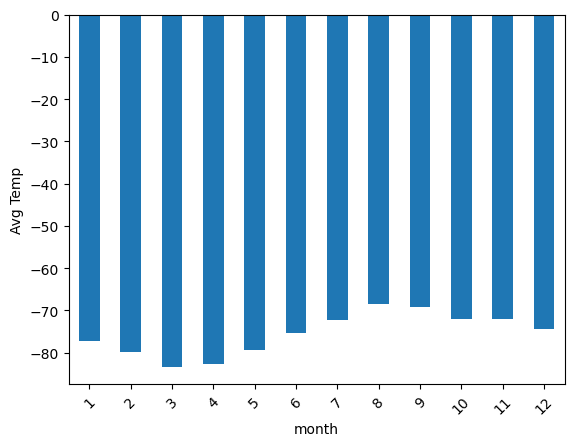

In [9]:
month_temp_avg = mars_temps.groupby('month').mean()['min_temp']
answer = [f"The coldest month on average is Month # {month_temp_avg.index[2]} with an average temperature of {month_temp_avg.min()}",
f"The warmest month on average is Month # {month_temp_avg.index[7]} with an average temperature of {month_temp_avg.max()}"]
display(month_temp_avg, answer, month_temp_avg.plot(kind='bar',rot=45,ylabel='Avg Temp'))

##### Which months have the lowest and the highest atmospheric pressure on Mars?

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

['The lowest pressure month on average is Month # 6 with an average pressure of 745.0544217687075',
 'The highest pressure month on average is Month # 9 with an average pressure of 913.3059701492538']

<AxesSubplot:xlabel='month', ylabel='Avg Pressure'>

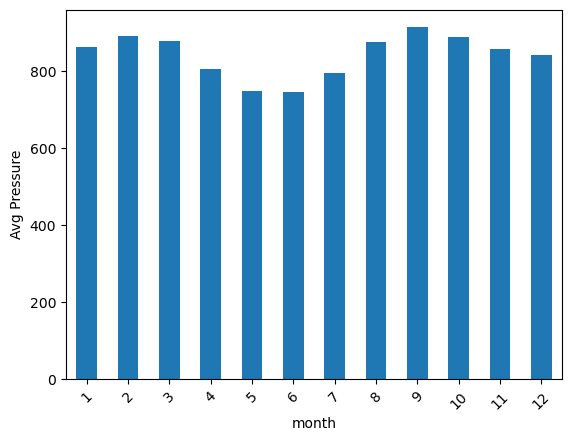

In [10]:
month_pressure_avg = mars_temps.groupby('month').mean()['pressure']
answer = [f"The lowest pressure month on average is Month # {month_pressure_avg.index[5]} with an average pressure of {month_pressure_avg.min()}",
f"The highest pressure month on average is Month # {month_pressure_avg.index[8]} with an average pressure of {month_pressure_avg.max()}"]
display(month_pressure_avg, answer, month_pressure_avg.plot(kind='bar',rot=45,ylabel='Avg Pressure'))

##### About how many terrestrial (Earth) days exist in a Martian year?

In [11]:
# locate the year start and end days in the dataframe

mars_temps.loc[mars_temps['ls']==0], mars_temps.loc[mars_temps['ls']==359]

(        id terrestrial_date   sol  ls  month  min_temp  pressure
 304    320       2013-08-01   351   0      1     -75.0     853.0
 305    319       2013-08-02   352   0      1     -77.0     854.0
 925    954       2015-06-19  1019   0      1     -81.0     849.0
 926    938       2015-06-20  1020   0      1     -63.0     832.0
 1579  1606       2017-05-06  1688   0      1     -76.0     840.0
 1580  1610       2017-05-07  1689   0      1     -75.0     840.0,
         id terrestrial_date   sol   ls  month  min_temp  pressure
 302    316       2013-07-30   349  359     12     -75.0     852.0
 303    318       2013-07-31   350  359     12     -76.0     853.0
 923    955       2015-06-17  1017  359     12     -78.0     850.0
 924    956       2015-06-18  1018  359     12     -79.0     850.0
 1577  1607       2017-05-04  1686  359     12     -75.0     838.0
 1578  1608       2017-05-05  1687  359     12     -75.0     838.0)

In [12]:
# slice the dataframe where the values of the 'ls' column are between a range of (0-359)

yr1 = mars_temps['terrestrial_date'].iloc[304:925,].nunique()
yr2 = mars_temps['terrestrial_date'].iloc[925:1579,].nunique()
yr1,yr2

(621, 654)

In [13]:
# average the count of days that temperature information was collected

days_in_mars_year = (yr1+yr2)/2
answer = f'There are approximately {days_in_mars_year} days in a year on Mars, based on the dataset collected'
answer

'There are approximately 637.5 days in a year on Mars, based on the dataset collected'

##### Export data to csv

In [14]:
mars_temps.to_csv('Mars_Temperature_data.csv', index=False)